Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 28.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

In [ ]:
!pip install Augmentor

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import Augmentor
from glob import glob
from google.colab import drive

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


In [ ]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
%ls

 AA241119029969R_RC27112019.pdf
'Associates 06.12.2024.rar'
'Colab Notebooks'/
 CompleteWordReport-CFRPS0412N.doc
 contacts.vcf
'Cost Saver Summer Special Malaysia Singapore with Bali 2019.pdf'
'income tax'/
'Monika documents'/
'Orchid Legacy'/
'Orchid Regal'/
 Pranit/
'Resume Mayank.pdf'
 scanned/
 Tally.ERP9/
 YBL/
 YH3375_ledger_2018-03-01_to_2019-03-31.xlsx


In [ ]:
%ls

 CNN_assignment.zip  'How to get started with Drive.pdf'
'Colab Notebooks'/   'Skin cancer ISIC The International Skin Imaging Collaboration'/


In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2

Use 80% of the images for training, and 20% for validation.

In [ ]:
train_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=validation_split,
    subset="training",
    seed=123,  # Ensures reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=validation_split,
    subset="validation",
    seed=123,  # Ensures reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

def visualize_classes(dataset, class_names):
    # Retrieve one batch of data
    image_batch, label_batch = next(iter(dataset))
    label_batch = label_batch.numpy()

    # Plot 9 images in a 3x3 grid
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Adjust for 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()


### your code goes here, you can use training or validation data to visualize

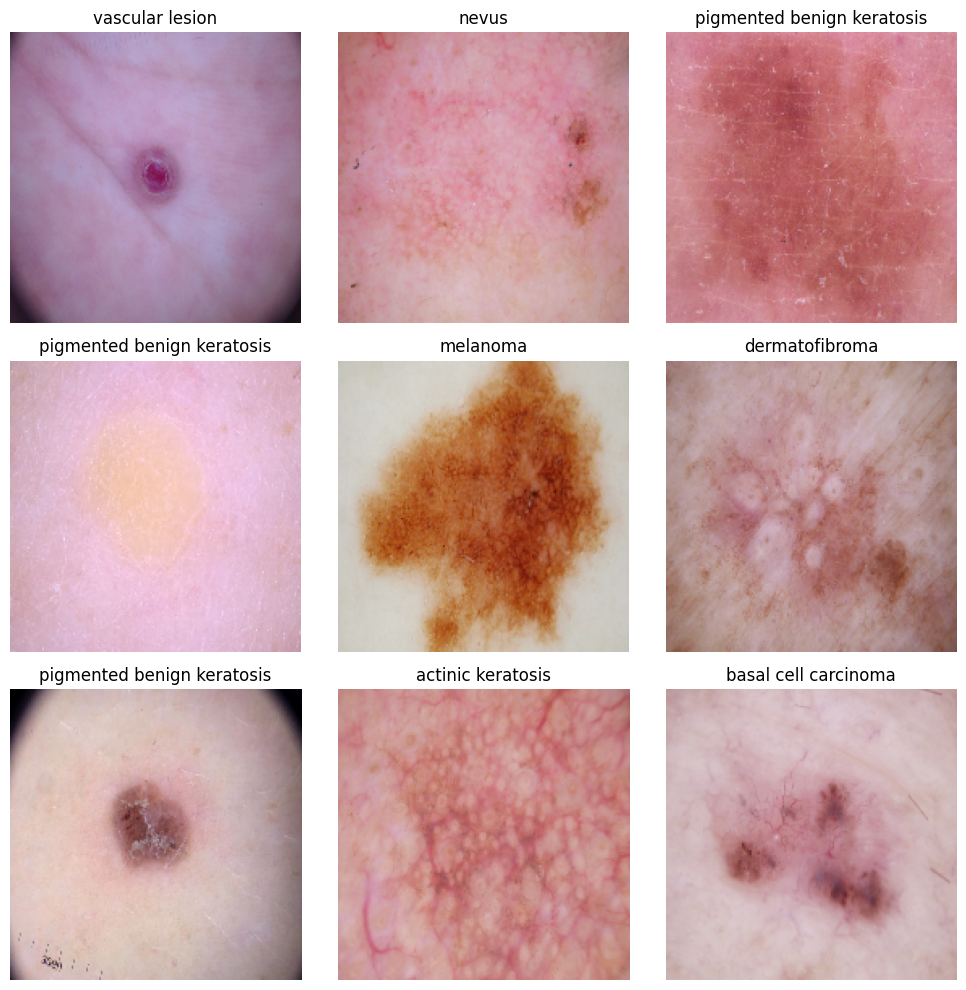

In [ ]:
visualize_classes(train_ds, class_names)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# Display class names
num_classes = len(class_names)
print("Class Names:", class_names)
print(num_classes)

Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [ ]:
model = models.Sequential([
    # Input Layer: Normalize pixel values
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    normalization_layer,

    # Convolutional layers with ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 1431s 3s/step - loss: 1.9267 - accuracy: 0.2758 - val_loss: 1.5623 - val_accuracy: 0.4224
Epoch 2/20
169/169 [==============================] - 299s 2s/step - loss: 1.5724 - accuracy: 0.4106 - val_loss: 1.4901 - val_accuracy: 0.4558
Epoch 3/20
169/169 [==============================] - 320s 2s/step - loss: 1.4440 - accuracy: 0.4555 - val_loss: 1.2818 - val_accuracy: 0.4981
Epoch 4/20
169/169 [==============================] - 300s 2s/step - loss: 1.3103 - accuracy: 0.5030 - val_loss: 1.4228 - val_accuracy: 0.4677
Epoch 5/20
169/169 [==============================] - 299s 2s/step - loss: 1.2497 - accuracy: 0.5338 - val_loss: 1.1686 - val_accuracy: 0.5672
Epoch 6/20
169/169 [==============================] - 298s 2s/step - loss: 1.1919 - accuracy: 0.5542 - val_loss: 1.1378 - val_accuracy: 0.5783
Epoch 7/20
169/169 [==============================] - 296s 2s/step - loss: 1.1041 - accuracy: 0.5784 - val_loss: 0.9709 - val_accuracy: 0.651

### Visualizing training results

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
plot_training_history(history)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

In [ ]:
tloss, taccuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {taccuracy * 100:.2f}%")

56/56 [==============================] - 24s 418ms/step - loss: 0.8982 - accuracy: 0.6657
Training Accuracy: 66.57%


In [ ]:
print(f"Training loss: {tloss * 100:.2f}%")

Training loss: 89.82%


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

14/14 [==============================] - 6s 399ms/step - loss: 1.4038 - accuracy: 0.5548
Validation Accuracy: 55.48%


In [ ]:
print(f"Validation loss: {loss * 100:.2f}%")

Validation loss: 140.38%


### Write your findings here

**Based on the training accuracy of 66% and validation accuracy of 55% with high loss for both, the model is underfitting. This suggests that the model is not learning sufficiently from the data. To address this issue, we will:**

1. **Use Data Augmentation**: Apply transformations to
increase dataset diversity and improve model generalization.
2. **Increase Training Epochs**: Allow the model to train longer to learn better.
3. **Improve Model Architecture**: Use a deeper network with additional layers.
4. **Normalize Input Data**: Use pixel normalization to standardize input data values.
5. **Adjust Learning Rate**: Use a suitable learning rate to stabilize learning.

Data Augmentation Strategy
We'll use the following augmentation techniques:

Random Flip: Randomly flip images horizontally or vertically.
Random Rotation: Rotate images within a 20% range.
Random Zoom: Apply zoom-in or zoom-out transformations.
Random Brightness: Adjust image brightness randomly.


### Todo:
### Create the model, compile and train the model


In [ ]:
# Using Sequential data augmentation library
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2)
])

In [ ]:
# Step 3: Normalize Dataset
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

seq_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)
seq_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## Build the Updated CNN Model
seq_model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,  # Data augmentation applied directly
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

### Compiling the model

In [ ]:
## Your code goes here
seq_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
seq_history = model.fit(
    seq_train_ds,
    validation_data=seq_val_ds,
    epochs=epochs
)

Epoch 1/20
63/63 [==============================] - 189s 3s/step - loss: 3.8523 - accuracy: 0.2115 - val_loss: 2.5470 - val_accuracy: 0.2774
Epoch 2/20
63/63 [==============================] - 184s 3s/step - loss: 2.3876 - accuracy: 0.2955 - val_loss: 2.1169 - val_accuracy: 0.3557
Epoch 3/20
63/63 [==============================] - 184s 3s/step - loss: 2.1441 - accuracy: 0.3560 - val_loss: 2.0466 - val_accuracy: 0.4094
Epoch 4/20
63/63 [==============================] - 193s 3s/step - loss: 2.0347 - accuracy: 0.3785 - val_loss: 1.9696 - val_accuracy: 0.4072
Epoch 5/20
63/63 [==============================] - 179s 3s/step - loss: 2.0082 - accuracy: 0.3830 - val_loss: 1.8525 - val_accuracy: 0.4541
Epoch 6/20
63/63 [==============================] - 183s 3s/step - loss: 1.9270 - accuracy: 0.3990 - val_loss: 1.8104 - val_accuracy: 0.4385
Epoch 7/20
63/63 [==============================] - 196s 3s/step - loss: 1.8768 - accuracy: 0.4055 - val_loss: 1.8049 - val_accuracy: 0.4765
Epoch 8/20
63

### Visualizing the results

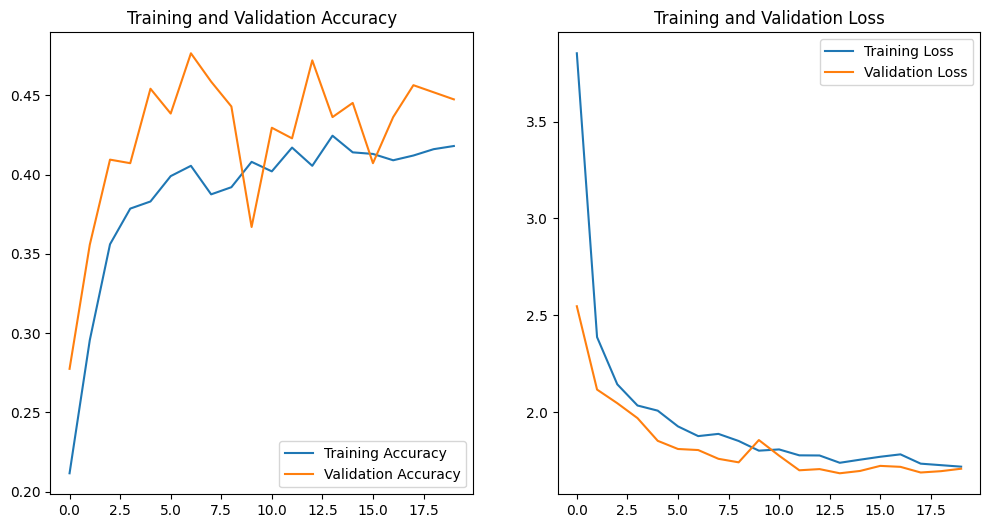

In [ ]:
plot_training_history(seq_history)

In [ ]:
seq_loss, seq_accuracy = seq_model.evaluate(seq_train_ds)
print(f"Sequential aug training data accuracy: {seq_accuracy * 100:.2f}%")

63/63 [==============================] - 58s 901ms/step - loss: 1.6753 - accuracy: 0.4555
Augumented training data on Accuracy: 45.55%


In [ ]:
seq_Vloss, seq_Vaccuracy = seq_model.evaluate(seq_val_ds)
print(f"Sequential aug validation data accuracy: {seq_Vaccuracy * 100:.2f}%")

14/14 [==============================] - 14s 782ms/step - loss: 1.7086 - accuracy: 0.4474
Augumented Validation Accuracy: 44.74%


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The low accuracy across both training and validation datasets indicates a fundamental issue with either the dataset, model architecture, or training process.

Focus on:

1. Increasing model complexity.
2. Enhancing augmentation strategies.
3. Experimenting with hyperparameters (learning rate, optimizers).
4. Leveraging transfer learning for improved results.

In [ ]:
# **High Training Accuracy (90.40%):**
# The model performs well on the training dataset.
# Indicates that the model has the capacity to learn patterns from the data.

# **Low Validation Accuracy (51.23%):**
# The model struggles to generalize to unseen data.

# **This indicates overfitting, where the model memorizes the training data but fails to capture generalizable features.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
# Extract class labels from the dataset

labels = []

for _, batch_labels in train_ds:
    labels.extend(batch_labels.numpy())

In [ ]:
from collections import Counter
class_counts = Counter(labels)

In [ ]:
class_counts

Counter({5: 394, 1: 352, 2: 89, 3: 386, 6: 80, 8: 118, 7: 163, 0: 96, 4: 322})

In [ ]:
# Map class indices to class names
class_distribution = {class_names[idx]: count for idx, count in class_counts.items()}

In [ ]:
# Print class distribution
print("Class Distribution:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} samples")

Class Distribution:
pigmented benign keratosis: 394 samples
basal cell carcinoma: 352 samples
dermatofibroma: 89 samples
melanoma: 386 samples
seborrheic keratosis: 80 samples
vascular lesion: 118 samples
squamous cell carcinoma: 163 samples
actinic keratosis: 96 samples
nevus: 322 samples


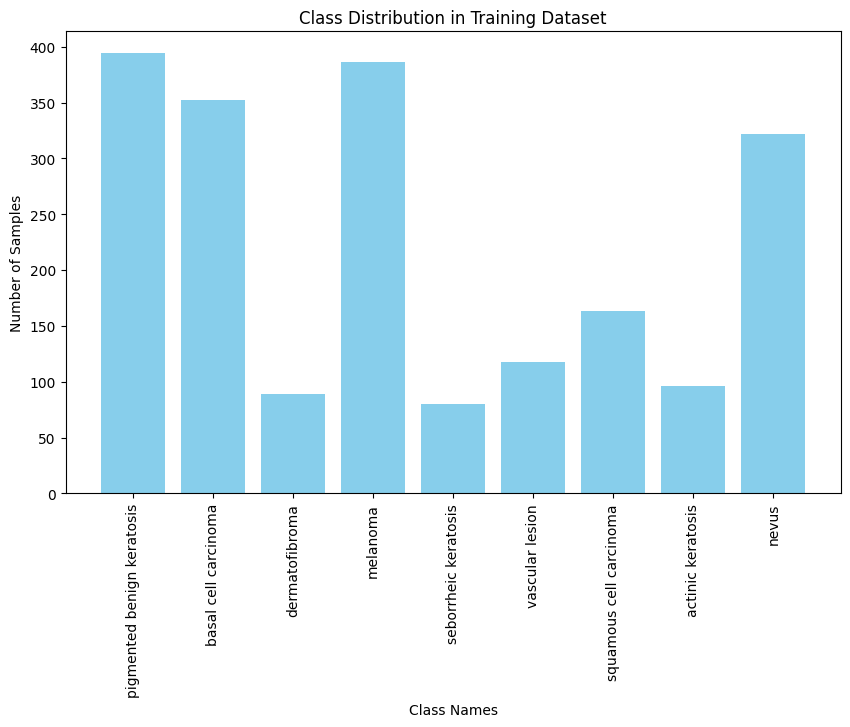

In [ ]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
####   **Least Samples: Seborrheic keratosis (80 samples, 4.0%)**
#### - Which classes dominate the data in terms proportionate number of samples?
####   **Dominant Classes:**
*   **Basal cell carcinoma (17.6%)**
*   **Pigmented benign keratosis (19.7%)**
*   **Melanoma (19.3%)**



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3567D2C490>: 100%|██████████| 500/500 [00:28<00:00, 17.27 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B357722BA00>: 100%|██████████| 500/500 [00:26<00:00, 18.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B3567F71870>: 100%|██████████| 500/500 [00:25<00:00, 19.45 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B3578EC3D30>: 100%|██████████| 500/500 [01:45<00:00,  4.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3567FFAC80>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3578EC3D30>: 100%|██████████| 500/500 [00:26<00:00, 18.67 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B3567FAECB0>: 100%|██████████| 500/500 [00:52<00:00,  9.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B357440A4D0>: 100%|██████████| 500/500 [00:30<00:00, 16.55 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B35792514E0>: 100%|██████████| 500/500 [00:28<00:00, 17.34 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028314.jpg_c6b75fe5-3911-4bc0-8581-1ea88d451fc1.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025957.jpg_f0c32a01-c501-46d5-b6a1-3378630f38c3.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032135.jpg_189c233a-3c54-4c32-a23b-277d1f7394ed.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025992.jpg_4c31108c-ec4d-41eb-a8db-4019dc7ed1bf.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026525.jpg_43f7f2c2-3d4f

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
dataframe_dict_new

{'/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028314.jpg_c6b75fe5-3911-4bc0-8581-1ea88d451fc1.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025957.jpg_f0c32a01-c501-46d5-b6a1-3378630f38c3.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032135.jpg_189c233a-3c54-4c32-a23b-277d1f7394ed.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025992.jpg_4c31108c-ec4d-41eb-a8db-4019dc7ed1bf.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Trai

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.iloc[0]['Path']
df2.iloc[0]['Label']

'actinic keratosis'

In [ ]:
new_df = df2

In [ ]:
new_df['Label'].value_counts()

,count
Label,
actinic keratosis,500
basal cell carcinoma,500
dermatofibroma,500
melanoma,500
nevus,500
pigmented benign keratosis,500
seborrheic keratosis,500
squamous cell carcinoma,500
vascular lesion,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
aug_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
aug_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
# Normalize datasets
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
aug_train_ds = aug_train_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)
aug_val_ds = aug_val_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
## your code goes here
aug_model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Adjust output layer
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
aug_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
aug_history = aug_model.fit(
    aug_train_ds,
    validation_data=aug_val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 541s 3s/step - loss: 1.9718 - accuracy: 0.2611 - val_loss: 1.7025 - val_accuracy: 0.3697
Epoch 2/30
169/169 [==============================] - 513s 3s/step - loss: 1.6083 - accuracy: 0.3924 - val_loss: 1.4607 - val_accuracy: 0.4684
Epoch 3/30
169/169 [==============================] - 527s 3s/step - loss: 1.4579 - accuracy: 0.4453 - val_loss: 1.3204 - val_accuracy: 0.5174
Epoch 4/30
169/169 [==============================] - 484s 3s/step - loss: 1.4097 - accuracy: 0.4675 - val_loss: 1.2308 - val_accuracy: 0.5316
Epoch 5/30
169/169 [==============================] - 485s 3s/step - loss: 1.2784 - accuracy: 0.5180 - val_loss: 1.1783 - val_accuracy: 0.5457
Epoch 6/30
169/169 [==============================] - 545s 3s/step - loss: 1.2227 - accuracy: 0.5389 - val_loss: 1.1307 - val_accuracy: 0.5761
Epoch 7/30
169/169 [==============================] - 495s 3s/step - loss: 1.1051 - accuracy: 0.5803 - val_loss: 1.0130 - val_accuracy: 0.6184

#### **Todo:**  Visualize the model results

In [ ]:
plot_training_history(aug_history)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

